# Hackathon:Shinkansen Travel Experience

**Data Dictionary**

**ID** : Unique id to the each passenger

**Overall_Experience** : Target variable telling the travel experince of the person'

**Seat_comfort** : Condition of the seat

**Seat_Class** :Quality of seat

**Arrival_time_convenient**	Arrival_time

**Catering**: Catering services

**Platform_location** : How far is platform

**Onboardwifi_service**: wifi services

**Onboard_entertainment**: facilities avaliable

**Online_support**: online support for the airline

**Onlinebooking_Ease** : Ease of online booking

**Onboard_service**	: what services are available

**Leg_room**: leg room in the flight

**Baggage_handling**: how the baggage is handeled

**Checkin_service**	: checkin services

**Cleanliness**	: neatness

**Online_boarding**: boarding services

**Gender**: Gender of the person

**CustomerType**: Type of customer	

**Age**: Age of the passenger	

**TypeTravel**:  For what reason they are travelling

**Travel_Class**: type of class	

**Travel_Distance**	: no of kms

**DepartureDelay_in_Mins**	: Delay in Departure

**ArrivalDel_in_Mins**: Arrival Delay


# **Problem Statement** 

The goal is to predict the travel experience of the person while using the bullet train.

How different features contribute to the overall experince of a person while using the bullet train

# Data Collection

**Import libraries**

In [477]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.multiclass import OneVsOneClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import get_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report

from sklearn.metrics import f1_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# import function to perform feature selection
from sklearn.feature_selection import RFE
plt.rcParams['figure.figsize'] = [15,8]

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

import sklearn
import sklearn.datasets
import sklearn.ensemble
import sklearn.model_selection

from sklearn.ensemble import StackingClassifier

from sklearn.preprocessing import label_binarize

from sklearn.metrics import plot_roc_curve

from sklearn.preprocessing import OneHotEncoder

**Read the Data**

In [478]:
df1=pd.read_csv("Surveydata_train.csv")
df1.head()

,ID,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,98800001,0,need improvement,Green Car,excellent,excellent,very convinient,good,need improvement,acceptable,need improvement,need improvement,acceptable,need improvement,good,need improvement,poor
1,98800002,0,poor,Ordinary,excellent,poor,need improvement,good,poor,good,good,excellent,need improvement,poor,need improvement,good,good
2,98800003,1,need improvement,Green Car,need improvement,need improvement,need improvement,need improvement,good,excellent,excellent,excellent,excellent,excellent,good,excellent,excellent
3,98800004,0,acceptable,Ordinary,need improvement,NaN,need improvement,acceptable,need improvement,acceptable,acceptable,acceptable,acceptable,acceptable,good,acceptable,acceptable
4,98800005,1,acceptable,Ordinary,acceptable,acceptable,manageable,need improvement,good,excellent,good,good,good,good,good,good,good


In [479]:
df1.shape

(94379, 17)

In [480]:
df2=pd.read_csv("Traveldata_train.csv")
df2.head()

,ID,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,98800001,Female,Loyal Customer,52.000000,NaN,Business,272,0.000000,5.000000
1,98800002,Male,Loyal Customer,48.000000,Personal Travel,Eco,2200,9.000000,0.000000
2,98800003,Female,Loyal Customer,43.000000,Business travel,Business,1061,77.000000,119.000000
3,98800004,Female,Loyal Customer,44.000000,Business travel,Business,780,13.000000,18.000000
4,98800005,Female,Loyal Customer,50.000000,Business travel,Business,1981,0.000000,0.000000


In [481]:
df2.shape

(94379, 9)

**Merge the data**

In [482]:
df3= pd.merge(df1,df2,on='ID')
df3.head()

,ID,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,98800001,0,need improvement,Green Car,excellent,excellent,very convinient,good,need improvement,acceptable,need improvement,need improvement,acceptable,need improvement,good,need improvement,poor,Female,Loyal Customer,52.000000,NaN,Business,272,0.000000,5.000000
1,98800002,0,poor,Ordinary,excellent,poor,need improvement,good,poor,good,good,excellent,need improvement,poor,need improvement,good,good,Male,Loyal Customer,48.000000,Personal Travel,Eco,2200,9.000000,0.000000
2,98800003,1,need improvement,Green Car,need improvement,need improvement,need improvement,need improvement,good,excellent,excellent,excellent,excellent,excellent,good,excellent,excellent,Female,Loyal Customer,43.000000,Business travel,Business,1061,77.000000,119.000000
3,98800004,0,acceptable,Ordinary,need improvement,NaN,need improvement,acceptable,need improvement,acceptable,acceptable,acceptable,acceptable,acceptable,good,acceptable,acceptable,Female,Loyal Customer,44.000000,Business travel,Business,780,13.000000,18.000000
4,98800005,1,acceptable,Ordinary,acceptable,acceptable,manageable,need improvement,good,excellent,good,good,good,good,good,good,good,Female,Loyal Customer,50.000000,Business travel,Business,1981,0.000000,0.000000


**Exploratory Data Analysis**

In [483]:
df3.shape

(94379, 25)

In [484]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Overall_Experience       94379 non-null  int64  
 2   Seat_comfort             94318 non-null  object 
 3   Seat_Class               94379 non-null  object 
 4   Arrival_time_convenient  85449 non-null  object 
 5   Catering                 85638 non-null  object 
 6   Platform_location        94349 non-null  object 
 7   Onboardwifi_service      94349 non-null  object 
 8   Onboard_entertainment    94361 non-null  object 
 9   Online_support           94288 non-null  object 
 10  Onlinebooking_Ease       94306 non-null  object 
 11  Onboard_service          86778 non-null  object 
 12  Leg_room                 94289 non-null  object 
 13  Baggage_handling         94237 non-null  object 
 14  Checkin_service       

In [485]:
df_num=df3.select_dtypes(include=np.number)
df_cat = df3.select_dtypes(include='object')

In [486]:
df_num.columns

Index(['ID', 'Overall_Experience', 'Age', 'Travel_Distance',
       'DepartureDelay_in_Mins', 'ArrivalDelay_in_Mins'],
      dtype='object')

In [487]:
df_cat.columns

Index(['Seat_comfort', 'Seat_Class', 'Arrival_time_convenient', 'Catering',
       'Platform_location', 'Onboardwifi_service', 'Onboard_entertainment',
       'Online_support', 'Onlinebooking_Ease', 'Onboard_service', 'Leg_room',
       'Baggage_handling', 'Checkin_service', 'Cleanliness', 'Online_boarding',
       'Gender', 'CustomerType', 'TypeTravel', 'Travel_Class'],
      dtype='object')

**Missing value treatment**

In [488]:
df3.isnull().sum()

ID                            0
Overall_Experience            0
Seat_comfort                 61
Seat_Class                    0
Arrival_time_convenient    8930
Catering                   8741
Platform_location            30
Onboardwifi_service          30
Onboard_entertainment        18
Online_support               91
Onlinebooking_Ease           73
Onboard_service            7601
Leg_room                     90
Baggage_handling            142
Checkin_service              77
Cleanliness                   6
Online_boarding               6
Gender                       77
CustomerType               8951
Age                          33
TypeTravel                 9226
Travel_Class                  0
Travel_Distance               0
DepartureDelay_in_Mins       57
ArrivalDelay_in_Mins        357
dtype: int64

In [489]:

missing_values = df3.isnull().sum()
total = df3.isnull().sum().sort_values(ascending=False)
percent = ((df3.isnull().sum()/df3.shape[0])*100)

percent = percent.sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data['Type'] = df3[missing_data.index].dtypes

missing_data

,Total,Percent,Type
TypeTravel,9226,9.775480,object
CustomerType,8951,9.484101,object
Arrival_time_convenient,8930,9.461851,object
Catering,8741,9.261594,object
Onboard_service,7601,8.053698,object
ArrivalDelay_in_Mins,357,0.378262,float64
Baggage_handling,142,0.150457,object
Online_support,91,0.096420,object
Leg_room,90,0.095360,object
Checkin_service,77,0.081586,object


**As we can see the missing data is less that 10 percent we can impute the data using mode**

In [490]:
df3.drop('Overall_Experience',axis=1).skew()

ID                        0.000000
Age                      -0.002387
Travel_Distance           0.473058
DepartureDelay_in_Mins    7.156803
ArrivalDelay_in_Mins      6.979685
dtype: float64

Replace the numerical skewed values with median and age column with mean and categorical values with mode.

In [491]:
df3['ArrivalDelay_in_Mins']=df3['ArrivalDelay_in_Mins'].fillna(df3.ArrivalDelay_in_Mins.median())

In [492]:
df3['DepartureDelay_in_Mins']=df3['DepartureDelay_in_Mins'].fillna(df3.DepartureDelay_in_Mins.median())
df3['Age']=df3['Age'].fillna(df3.Age.mean())

In [493]:
df_cat.isnull().sum()

Seat_comfort                 61
Seat_Class                    0
Arrival_time_convenient    8930
Catering                   8741
Platform_location            30
Onboardwifi_service          30
Onboard_entertainment        18
Online_support               91
Onlinebooking_Ease           73
Onboard_service            7601
Leg_room                     90
Baggage_handling            142
Checkin_service              77
Cleanliness                   6
Online_boarding               6
Gender                       77
CustomerType               8951
TypeTravel                 9226
Travel_Class                  0
dtype: int64

In [494]:
cols = ['Seat_comfort', 'Arrival_time_convenient', 'Catering',
       'Platform_location', 'Onboardwifi_service', 'Onboard_entertainment',
       'Online_support', 'Onlinebooking_Ease', 'Onboard_service', 'Leg_room',
       'Baggage_handling', 'Checkin_service', 'Cleanliness', 'Online_boarding',
       'Gender', 'CustomerType', 'TypeTravel']
df3[cols]=df3[cols].fillna(df3.mode().iloc[0])

In [495]:
df3.isnull().sum()

ID                         0
Overall_Experience         0
Seat_comfort               0
Seat_Class                 0
Arrival_time_convenient    0
Catering                   0
Platform_location          0
Onboardwifi_service        0
Onboard_entertainment      0
Online_support             0
Onlinebooking_Ease         0
Onboard_service            0
Leg_room                   0
Baggage_handling           0
Checkin_service            0
Cleanliness                0
Online_boarding            0
Gender                     0
CustomerType               0
Age                        0
TypeTravel                 0
Travel_Class               0
Travel_Distance            0
DepartureDelay_in_Mins     0
ArrivalDelay_in_Mins       0
dtype: int64

So we have treated the missing values in our data

**Outlier treatment**

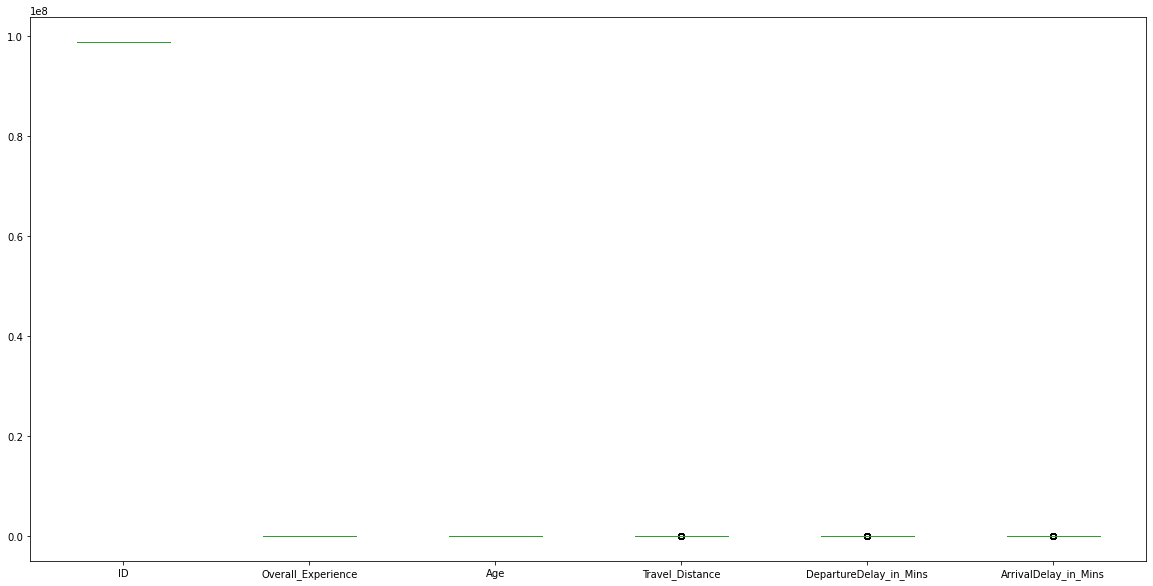

In [496]:
df3.plot(kind='box',figsize=(20,10))
plt.show()

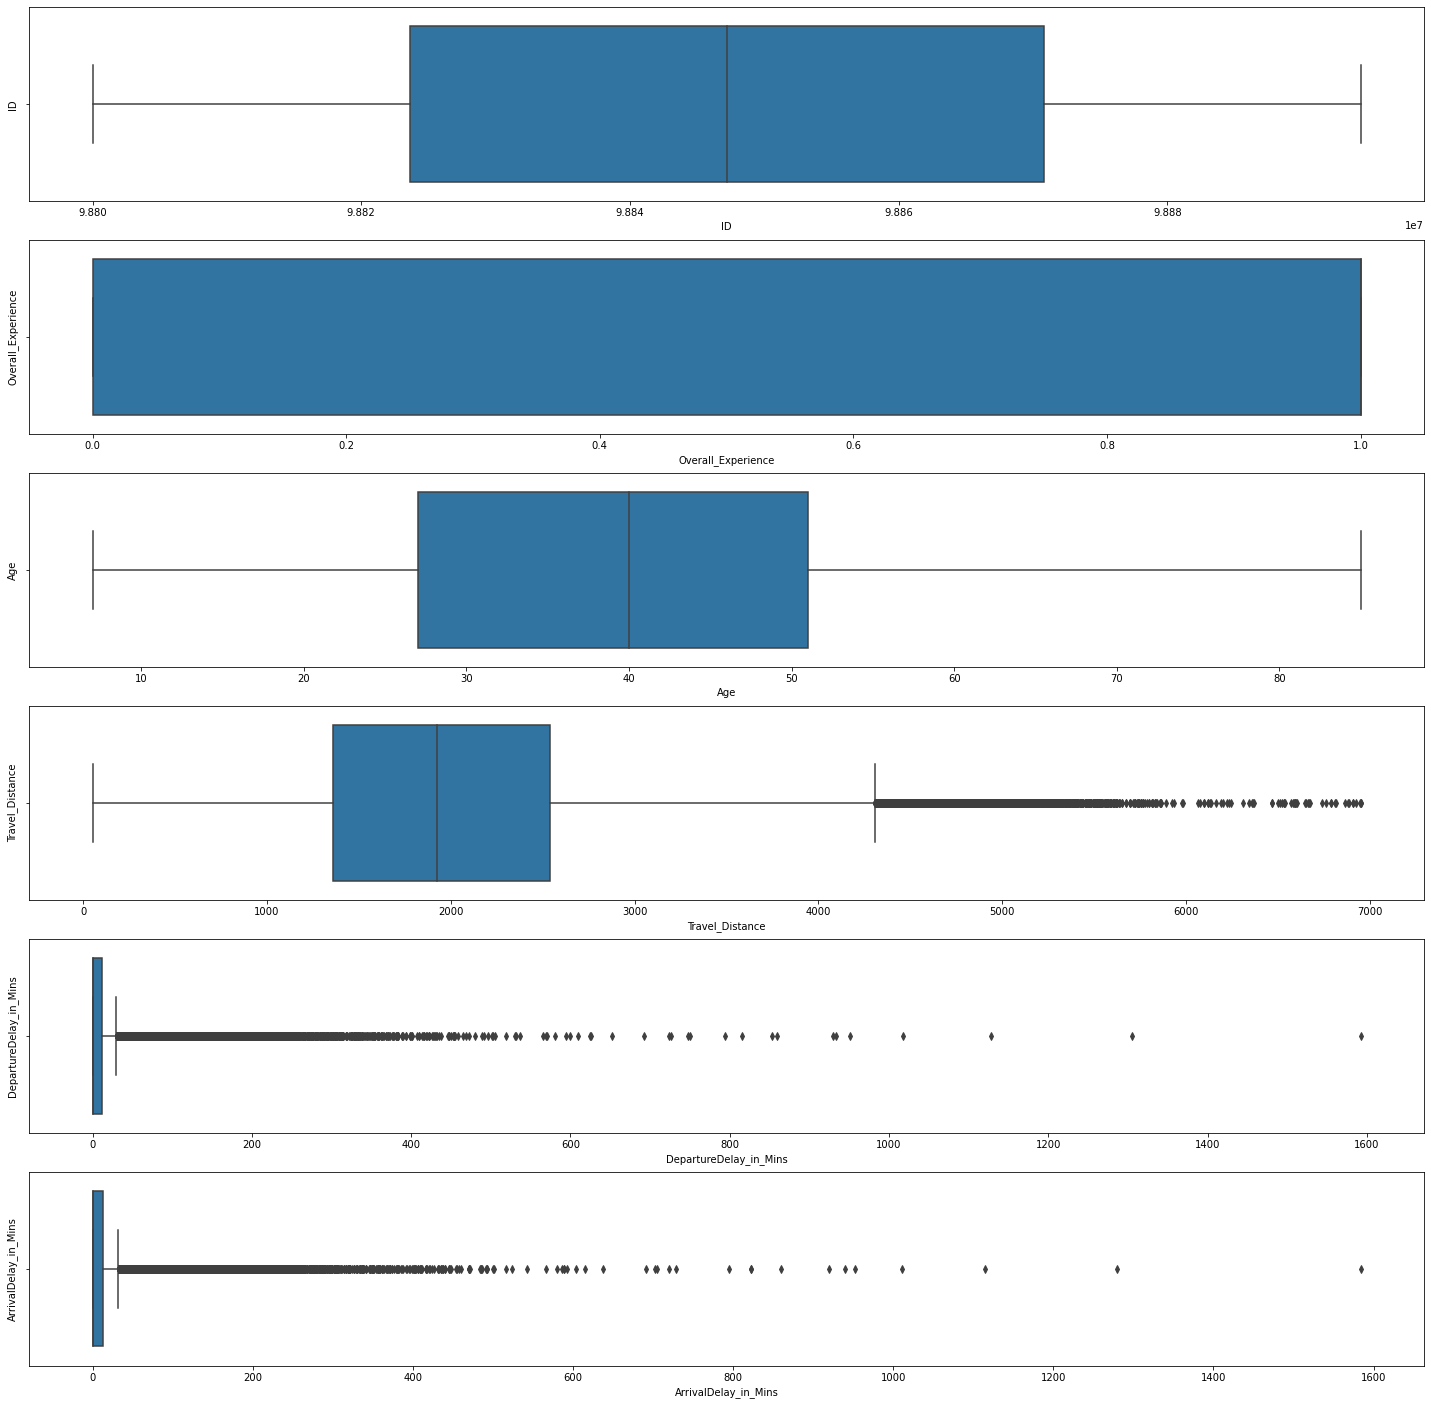

In [497]:
plt.figure(figsize = (25,25))
for i,col in enumerate(df_num,1):
    plt.subplot(df_num.shape[1],1,i)
    sns.boxplot(df3[col])
    plt.ylabel(col)
plt.show()

In [498]:
# obtain the first quartile
Q1 = df_num.drop('ID',axis=1).quantile(0.25)

# obtain the third quartile
Q3 = df_num.drop('ID',axis=1).quantile(0.75)

# obtain the IQR
IQR = Q3 - Q1

# print the IQR
print(IQR)

Overall_Experience          1.000000
Age                        24.000000
Travel_Distance          1179.000000
DepartureDelay_in_Mins     12.000000
ArrivalDelay_in_Mins       13.000000
dtype: float64


array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Travel_Distance'}>,
        <AxesSubplot:title={'center':'DepartureDelay_in_Mins'}>],
       [<AxesSubplot:title={'center':'ArrivalDelay_in_Mins'}>,
        <AxesSubplot:>]], dtype=object)

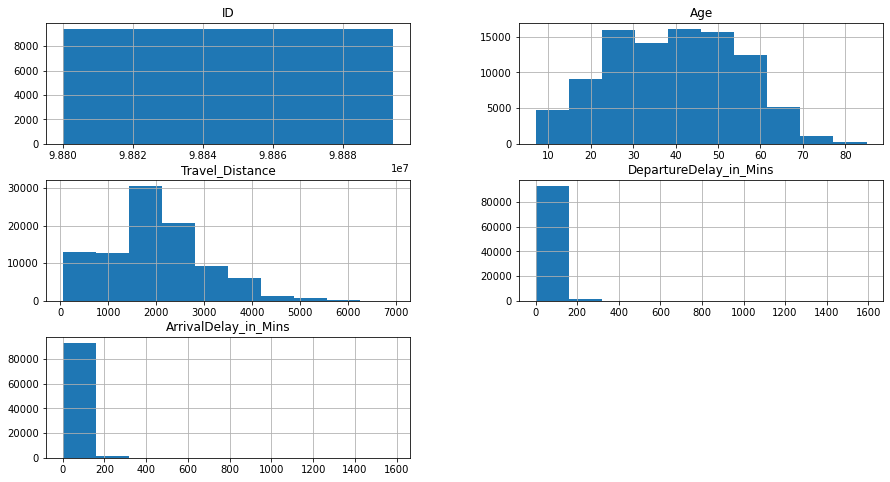

In [499]:
df3.drop('Overall_Experience', axis = 1).hist()

In [500]:
df3 = df3[~((df3 < (Q1 - 1.5 * IQR)) |(df3 > (Q3 + 1.5 * IQR))).any(axis=1)]

**Unique values**

In [501]:
df3.describe()

,ID,Overall_Experience,Age,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
count,77879.000000,77879.000000,77879.000000,77879.000000,77879.000000,77879.000000
mean,98847224.648262,0.561448,39.685896,1902.240090,3.421834,3.496462
std,27226.953460,0.496213,15.111613,945.181280,6.696161,6.744729
min,98800001.000000,0.000000,7.000000,50.000000,0.000000,0.000000
25%,98823675.500000,0.000000,27.000000,1315.000000,0.000000,0.000000
50%,98847275.000000,1.000000,40.000000,1883.000000,0.000000,0.000000
75%,98870770.000000,1.000000,51.000000,2474.000000,3.000000,4.000000
max,98894379.000000,1.000000,85.000000,4306.000000,30.000000,32.000000


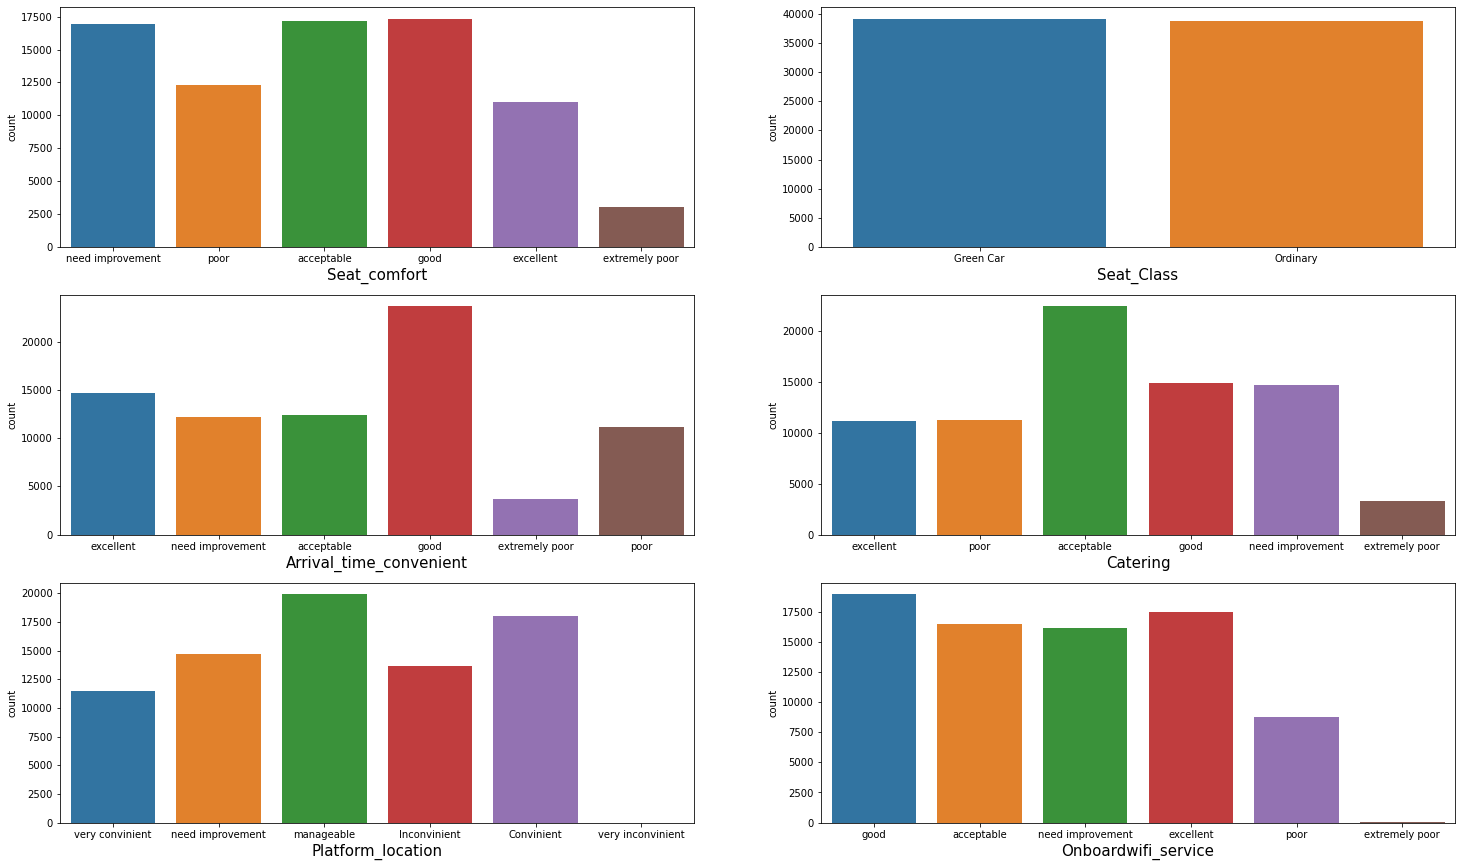

In [502]:
fig,ax = plt.subplots(3,2, figsize = (25,15))
for variable,subplot in zip(df_cat,ax.flatten()):
    boxplot = sns.countplot(x =variable, data=df3 , ax=subplot)
    boxplot.set_xlabel(variable,fontsize=15)
plt.show()

<AxesSubplot:xlabel='Overall_Experience', ylabel='count'>

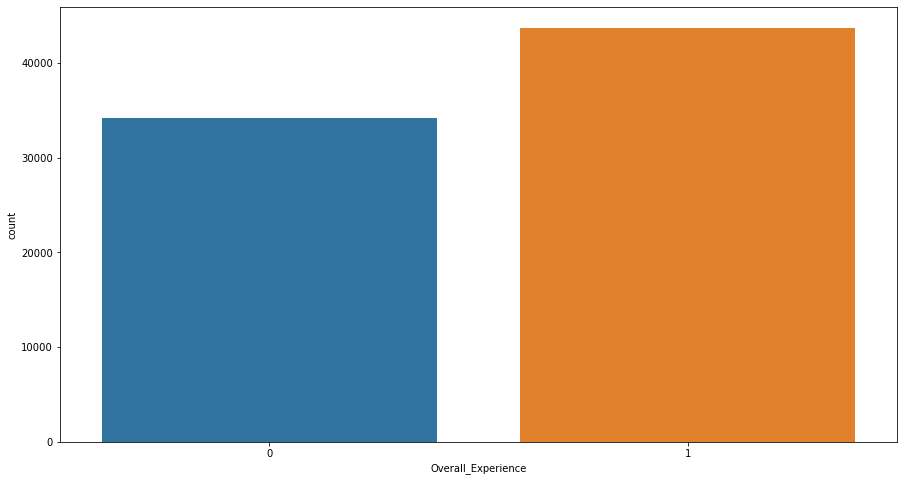

In [503]:
sns.countplot(df3.Overall_Experience)

There is not much of unbalance present in our data

<AxesSubplot:>

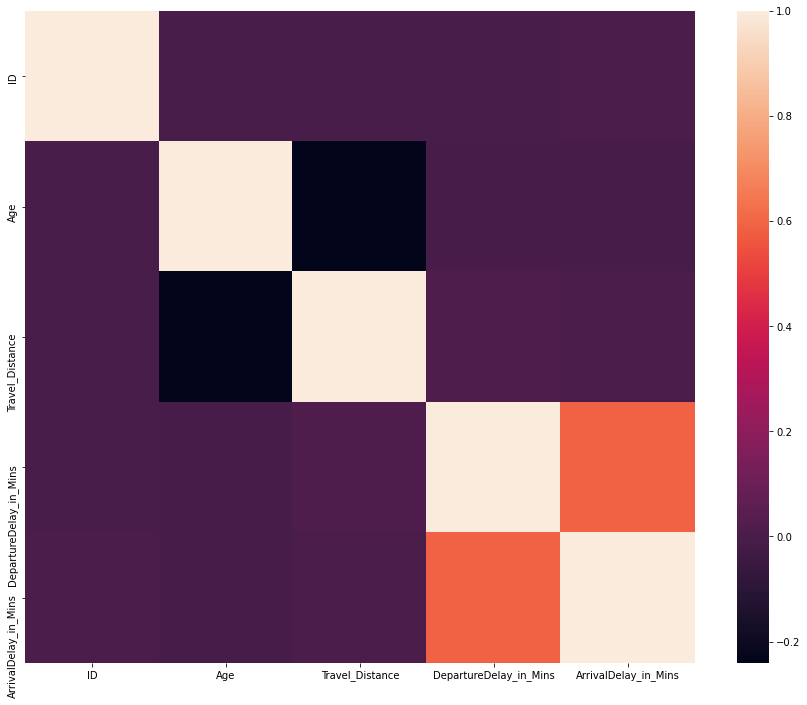

In [504]:
fig = plt.figure(figsize=(15,12))
sns.heatmap(df3.drop('Overall_Experience',axis=1).corr())

# Feature_transformation

In [505]:
df_num.head()

,ID,Overall_Experience,Age,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,98800001,0,52.000000,272,0.000000,5.000000
1,98800002,0,48.000000,2200,9.000000,0.000000
2,98800003,1,43.000000,1061,77.000000,119.000000
3,98800004,0,44.000000,780,13.000000,18.000000
4,98800005,1,50.000000,1981,0.000000,0.000000


In [506]:
df_cat.head()

,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Gender,CustomerType,TypeTravel,Travel_Class
0,need improvement,Green Car,excellent,excellent,very convinient,good,need improvement,acceptable,need improvement,need improvement,acceptable,need improvement,good,need improvement,poor,Female,Loyal Customer,NaN,Business
1,poor,Ordinary,excellent,poor,need improvement,good,poor,good,good,excellent,need improvement,poor,need improvement,good,good,Male,Loyal Customer,Personal Travel,Eco
2,need improvement,Green Car,need improvement,need improvement,need improvement,need improvement,good,excellent,excellent,excellent,excellent,excellent,good,excellent,excellent,Female,Loyal Customer,Business travel,Business
3,acceptable,Ordinary,need improvement,NaN,need improvement,acceptable,need improvement,acceptable,acceptable,acceptable,acceptable,acceptable,good,acceptable,acceptable,Female,Loyal Customer,Business travel,Business
4,acceptable,Ordinary,acceptable,acceptable,manageable,need improvement,good,excellent,good,good,good,good,good,good,good,Female,Loyal Customer,Business travel,Business


In [507]:
df_num=df3.select_dtypes(include=np.number)
df_cat = df3.select_dtypes(include='object')

In [508]:
df_cat = pd.get_dummies(df_cat)

In [509]:
df_cat.head()

,Seat_comfort_acceptable,Seat_comfort_excellent,Seat_comfort_extremely poor,Seat_comfort_good,Seat_comfort_need improvement,Seat_comfort_poor,Seat_Class_Green Car,Seat_Class_Ordinary,Arrival_time_convenient_acceptable,Arrival_time_convenient_excellent,Arrival_time_convenient_extremely poor,Arrival_time_convenient_good,Arrival_time_convenient_need improvement,Arrival_time_convenient_poor,Catering_acceptable,Catering_excellent,Catering_extremely poor,Catering_good,Catering_need improvement,Catering_poor,Platform_location_Convinient,Platform_location_Inconvinient,Platform_location_manageable,Platform_location_need improvement,Platform_location_very convinient,Platform_location_very inconvinient,Onboardwifi_service_acceptable,Onboardwifi_service_excellent,Onboardwifi_service_extremely poor,Onboardwifi_service_good,Onboardwifi_service_need improvement,Onboardwifi_service_poor,Onboard_entertainment_acceptable,Onboard_entertainment_excellent,Onboard_entertainment_extremely poor,Onboard_entertainment_good,Onboard_entertainment_need improvement,Onboard_entertainment_poor,Online_support_acceptable,Online_support_excellent,Online_support_good,Online_support_need improvement,Online_support_poor,Onlinebooking_Ease_acceptable,Onlinebooking_Ease_excellent,Onlinebooking_Ease_extremely poor,Onlinebooking_Ease_good,Onlinebooking_Ease_need improvement,Onlinebooking_Ease_poor,Onboard_service_acceptable,Onboard_service_excellent,Onboard_service_extremely poor,Onboard_service_good,Onboard_service_need improvement,Onboard_service_poor,Leg_room_acceptable,Leg_room_excellent,Leg_room_extremely poor,Leg_room_good,Leg_room_need improvement,Leg_room_poor,Baggage_handling_acceptable,Baggage_handling_excellent,Baggage_handling_good,Baggage_handling_need improvement,Baggage_handling_poor,Checkin_service_acceptable,Checkin_service_excellent,Checkin_service_good,Checkin_service_need improvement,Checkin_service_poor,Cleanliness_acceptable,Cleanliness_excellent,Cleanliness_extremely poor,Cleanliness_good,Cleanliness_need improvement,Cleanliness_poor,Online_boarding_acceptable,Online_boarding_excellent,Online_boarding_extremely poor,Online_boarding_good,Online_boarding_need improvement,Online_boarding_poor,Gender_Female,Gender_Male,CustomerType_Loyal Customer,CustomerType_disloyal Customer,TypeTravel_Business travel,TypeTravel_Personal Travel,Travel_Class_Business,Travel_Class_Eco
0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0
1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1
3,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0
4,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0
5,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,1,0


In [510]:
df_cat.shape

(77879, 91)

In [511]:
df_num.shape

(77879, 6)

In [512]:
df4 = pd.concat([df_num,df_cat],axis=1)
df4.head()

,ID,Overall_Experience,Age,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Seat_comfort_acceptable,Seat_comfort_excellent,Seat_comfort_extremely poor,Seat_comfort_good,Seat_comfort_need improvement,Seat_comfort_poor,Seat_Class_Green Car,Seat_Class_Ordinary,Arrival_time_convenient_acceptable,Arrival_time_convenient_excellent,Arrival_time_convenient_extremely poor,Arrival_time_convenient_good,Arrival_time_convenient_need improvement,Arrival_time_convenient_poor,Catering_acceptable,Catering_excellent,Catering_extremely poor,Catering_good,Catering_need improvement,Catering_poor,Platform_location_Convinient,Platform_location_Inconvinient,Platform_location_manageable,Platform_location_need improvement,Platform_location_very convinient,Platform_location_very inconvinient,Onboardwifi_service_acceptable,Onboardwifi_service_excellent,Onboardwifi_service_extremely poor,Onboardwifi_service_good,Onboardwifi_service_need improvement,Onboardwifi_service_poor,Onboard_entertainment_acceptable,Onboard_entertainment_excellent,Onboard_entertainment_extremely poor,Onboard_entertainment_good,Onboard_entertainment_need improvement,Onboard_entertainment_poor,Online_support_acceptable,Online_support_excellent,Online_support_good,Online_support_need improvement,Online_support_poor,Onlinebooking_Ease_acceptable,Onlinebooking_Ease_excellent,Onlinebooking_Ease_extremely poor,Onlinebooking_Ease_good,Onlinebooking_Ease_need improvement,Onlinebooking_Ease_poor,Onboard_service_acceptable,Onboard_service_excellent,Onboard_service_extremely poor,Onboard_service_good,Onboard_service_need improvement,Onboard_service_poor,Leg_room_acceptable,Leg_room_excellent,Leg_room_extremely poor,Leg_room_good,Leg_room_need improvement,Leg_room_poor,Baggage_handling_acceptable,Baggage_handling_excellent,Baggage_handling_good,Baggage_handling_need improvement,Baggage_handling_poor,Checkin_service_acceptable,Checkin_service_excellent,Checkin_service_good,Checkin_service_need improvement,Checkin_service_poor,Cleanliness_acceptable,Cleanliness_excellent,Cleanliness_extremely poor,Cleanliness_good,Cleanliness_need improvement,Cleanliness_poor,Online_boarding_acceptable,Online_boarding_excellent,Online_boarding_extremely poor,Online_boarding_good,Online_boarding_need improvement,Online_boarding_poor,Gender_Female,Gender_Male,CustomerType_Loyal Customer,CustomerType_disloyal Customer,TypeTravel_Business travel,TypeTravel_Personal Travel,Travel_Class_Business,Travel_Class_Eco
0,98800001,0,52.000000,272,0.000000,5.000000,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0
1,98800002,0,48.000000,2200,9.000000,0.000000,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1
3,98800004,0,44.000000,780,13.000000,18.000000,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0
4,98800005,1,50.000000,1981,0.000000,0.000000,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0
5,98800006,1,44.000000,2810,0.000000,0.000000,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,1,0


In [513]:
df4.shape

(77879, 97)

In [514]:
df4.columns

Index(['ID', 'Overall_Experience', 'Age', 'Travel_Distance',
       'DepartureDelay_in_Mins', 'ArrivalDelay_in_Mins',
       'Seat_comfort_acceptable', 'Seat_comfort_excellent',
       'Seat_comfort_extremely poor', 'Seat_comfort_good',
       'Seat_comfort_need improvement', 'Seat_comfort_poor',
       'Seat_Class_Green Car', 'Seat_Class_Ordinary',
       'Arrival_time_convenient_acceptable',
       'Arrival_time_convenient_excellent',
       'Arrival_time_convenient_extremely poor',
       'Arrival_time_convenient_good',
       'Arrival_time_convenient_need improvement',
       'Arrival_time_convenient_poor', 'Catering_acceptable',
       'Catering_excellent', 'Catering_extremely poor', 'Catering_good',
       'Catering_need improvement', 'Catering_poor',
       'Platform_location_Convinient', 'Platform_location_Inconvinient',
       'Platform_location_manageable', 'Platform_location_need improvement',
       'Platform_location_very convinient',
       'Platform_location_very inconvi

In [515]:
scale = StandardScaler()
df_num_scaled = scale.fit_transform(df_num)
df_num_scaled = pd.DataFrame(df_num_scaled,columns=df_num.columns)
df_num_scaled = df_num_scaled.drop('Overall_Experience',axis=1)
df_num_scaled.head()

,ID,Age,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,-1.734456,0.814882,-1.724802,-0.511018,0.222922
1,-1.734419,0.550183,0.315031,0.833045,-0.518403
2,-1.734346,0.285485,-1.187336,1.430406,2.150365
3,-1.734309,0.682533,0.083328,-0.511018,-0.518403
4,-1.734272,0.285485,0.960414,-0.511018,-0.518403


In [516]:
df4.shape

(77879, 97)

In [517]:
df_num_scaled.shape

(77879, 5)

In [518]:
df5=df4.drop(['Platform_location_very inconvinient','Onboard_service_extremely poor','Cleanliness_extremely poor'],axis=1)

In [519]:
df5.head()

,ID,Overall_Experience,Age,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Seat_comfort_acceptable,Seat_comfort_excellent,Seat_comfort_extremely poor,Seat_comfort_good,Seat_comfort_need improvement,Seat_comfort_poor,Seat_Class_Green Car,Seat_Class_Ordinary,Arrival_time_convenient_acceptable,Arrival_time_convenient_excellent,Arrival_time_convenient_extremely poor,Arrival_time_convenient_good,Arrival_time_convenient_need improvement,Arrival_time_convenient_poor,Catering_acceptable,Catering_excellent,Catering_extremely poor,Catering_good,Catering_need improvement,Catering_poor,Platform_location_Convinient,Platform_location_Inconvinient,Platform_location_manageable,Platform_location_need improvement,Platform_location_very convinient,Onboardwifi_service_acceptable,Onboardwifi_service_excellent,Onboardwifi_service_extremely poor,Onboardwifi_service_good,Onboardwifi_service_need improvement,Onboardwifi_service_poor,Onboard_entertainment_acceptable,Onboard_entertainment_excellent,Onboard_entertainment_extremely poor,Onboard_entertainment_good,Onboard_entertainment_need improvement,Onboard_entertainment_poor,Online_support_acceptable,Online_support_excellent,Online_support_good,Online_support_need improvement,Online_support_poor,Onlinebooking_Ease_acceptable,Onlinebooking_Ease_excellent,Onlinebooking_Ease_extremely poor,Onlinebooking_Ease_good,Onlinebooking_Ease_need improvement,Onlinebooking_Ease_poor,Onboard_service_acceptable,Onboard_service_excellent,Onboard_service_good,Onboard_service_need improvement,Onboard_service_poor,Leg_room_acceptable,Leg_room_excellent,Leg_room_extremely poor,Leg_room_good,Leg_room_need improvement,Leg_room_poor,Baggage_handling_acceptable,Baggage_handling_excellent,Baggage_handling_good,Baggage_handling_need improvement,Baggage_handling_poor,Checkin_service_acceptable,Checkin_service_excellent,Checkin_service_good,Checkin_service_need improvement,Checkin_service_poor,Cleanliness_acceptable,Cleanliness_excellent,Cleanliness_good,Cleanliness_need improvement,Cleanliness_poor,Online_boarding_acceptable,Online_boarding_excellent,Online_boarding_extremely poor,Online_boarding_good,Online_boarding_need improvement,Online_boarding_poor,Gender_Female,Gender_Male,CustomerType_Loyal Customer,CustomerType_disloyal Customer,TypeTravel_Business travel,TypeTravel_Personal Travel,Travel_Class_Business,Travel_Class_Eco
0,98800001,0,52.000000,272,0.000000,5.000000,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0
1,98800002,0,48.000000,2200,9.000000,0.000000,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1
3,98800004,0,44.000000,780,13.000000,18.000000,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0
4,98800005,1,50.000000,1981,0.000000,0.000000,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0
5,98800006,1,44.000000,2810,0.000000,0.000000,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,1,0


In [520]:
df5.shape

(77879, 94)

# Data Preparation

In [521]:
x = df5.drop('Overall_Experience', axis=1)
y = df5['Overall_Experience']

In [522]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [523]:
x_train.shape

(62303, 93)

# Model Building

In [524]:
cols = ['Algorithm', 'Accuracy', 'F1_score']
result_table = pd.DataFrame(columns=cols)

# Logistic Regression

In [525]:
lr = LogisticRegression()
model_lr=lr.fit(x_train,y_train)

In [526]:
y_pred = lr.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

confusion matrix:
 [[   0 6885]
 [   0 8691]]


In [527]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6885
           1       0.56      1.00      0.72      8691

    accuracy                           0.56     15576
   macro avg       0.28      0.50      0.36     15576
weighted avg       0.31      0.56      0.40     15576



In [528]:
acc_logreg = model_lr.score(x_test,y_test)
f1_logreg = metrics.f1_score(y_test,y_pred,average='weighted')

In [529]:
log_reg_metrics = pd.Series({'Algorithm':'Logistic Regressiom',
                            'Accuracy':acc_logreg*100,
                            'F1_score': "{:.2f}".format(f1_logreg)})

result_table = result_table.append(log_reg_metrics,ignore_index=True)
result_table

,Algorithm,Accuracy,F1_score
0,Logistic Regressiom,55.797381,0.40


# 7.b Naive Baye's Algorithm

In [530]:
gauss = GaussianNB()
model_gauss = gauss.fit(x_train, y_train)

In [531]:
y_pred_gauss = model_gauss.predict(x_test)

In [532]:
print(classification_report(y_test,y_pred_gauss))

              precision    recall  f1-score   support

           0       0.86      0.64      0.73      6885
           1       0.76      0.91      0.83      8691

    accuracy                           0.79     15576
   macro avg       0.81      0.78      0.78     15576
weighted avg       0.80      0.79      0.79     15576



In [533]:
cm_gauss = confusion_matrix(y_test, y_pred_gauss)
cm_gauss

array([[4408, 2477],
       [ 741, 7950]], dtype=int64)

Text(114.0, 0.5, 'Actual')

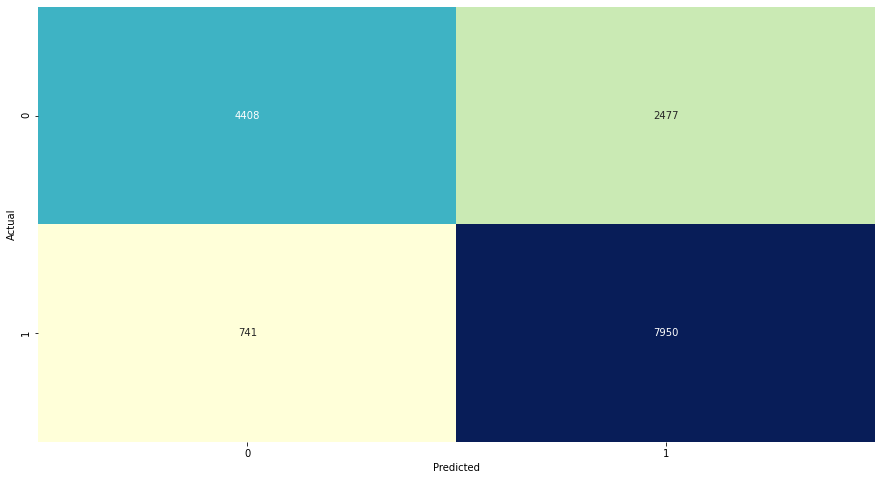

In [534]:
sns.heatmap(cm_gauss,annot=True,cmap="YlGnBu",cbar=False,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [535]:
acc_gauss = model_gauss.score(x_test,y_test)
f1_gauss = metrics.f1_score(y_test,y_pred_gauss,average='weighted')

In [536]:
gauss_metrics = pd.Series({'Algorithm':'Gaussian Naive Bayes',
                            'Accuracy':acc_gauss*100,
                            'F1_score': "{:.2f}".format(f1_gauss)})

result_table = result_table.append(gauss_metrics,ignore_index=True)
result_table

,Algorithm,Accuracy,F1_score
0,Logistic Regressiom,55.797381,0.40
1,Gaussian Naive Bayes,79.340010,0.79


# 7.d Decision Tree

In [537]:
dt = DecisionTreeClassifier()
dt_model = dt.fit(x_train,y_train)

In [538]:
y_pred_dt = dt_model.predict(x_test)

In [539]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      6885
           1       0.93      0.94      0.93      8691

    accuracy                           0.93     15576
   macro avg       0.92      0.92      0.92     15576
weighted avg       0.93      0.93      0.93     15576



Text(114.0, 0.5, 'Actual')

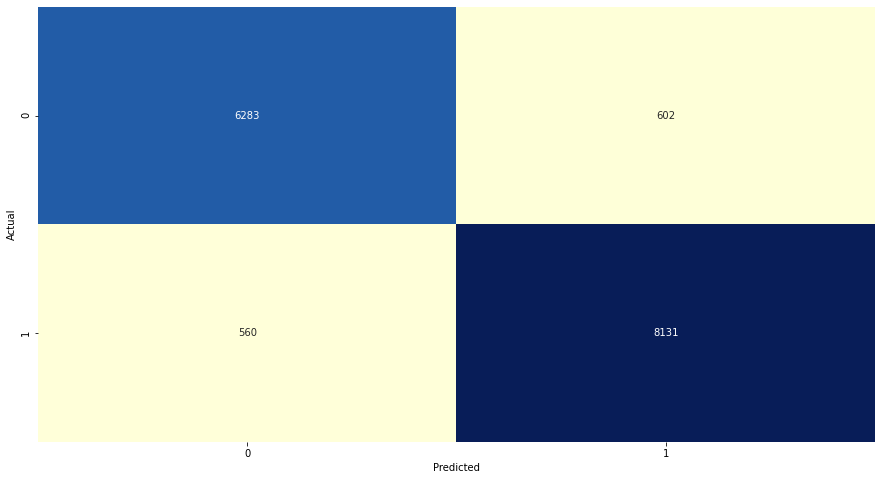

In [540]:
cm_dt = confusion_matrix(y_test,y_pred_dt)
sns.heatmap(cm_dt,annot=True,cmap="YlGnBu",cbar=False,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [541]:
acc_dt = dt_model.score(x_test,y_test)
f1_dt = metrics.f1_score(y_test,y_pred_dt,average='weighted')

dt_metrics = pd.Series({'Algorithm':'Decision Tree',
                            'Accuracy':acc_dt*100,
                            'F1_score': "{:.2f}".format(f1_dt)})

result_table = result_table.append(dt_metrics,ignore_index=True)
result_table

,Algorithm,Accuracy,F1_score
0,Logistic Regressiom,55.797381,0.40
1,Gaussian Naive Bayes,79.340010,0.79
2,Decision Tree,92.539805,0.93


# 7.e Random Forest Algorithm

In [542]:
rd = RandomForestClassifier()
rd_model = rd.fit(x_train,y_train)

In [543]:
y_pred_rd = rd_model.predict(x_test)

In [544]:
x_train.shape

(62303, 93)

In [545]:
df8.shape

(29595, 93)

In [546]:
y_pred_rd1 = rd_model.predict(df8)

In [ ]:
print(classification_report(y_test,y_pred_rd))

In [ ]:
y_pred = rd_model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

In [ ]:
cm_rd = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_rd,annot = True,cmap="YlGnBu",cbar=False,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
acc_rd = rd_model.score(x_test,y_test)
f1_rd= metrics.f1_score(y_test,y_pred_rd,average='weighted')

rd_metrics = pd.Series({'Algorithm':'Random Forest',
                            'Accuracy':acc_rd*100,
                            'F1_score': "{:.2f}".format(f1_rd)})

result_table = result_table.append(rd_metrics,ignore_index=True)
result_table

From the above Models we can tell that **Random Forest** is giving the highest accuracies

# Ensemble Techniques

# 8.a.Ada Boost

In [ ]:
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)

ada_model.fit(x_train, y_train)

In [ ]:
y_pred_adaboost = ada_model.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred_adaboost))

In [ ]:
cm_adaboost = confusion_matrix(y_test,y_pred_adaboost)
cm_adaboost

In [ ]:
acc_ada = ada_model.score(x_test,y_test)
f1_ada = metrics.f1_score(y_test,y_pred_adaboost,average='weighted')

ada_metrics = pd.Series({'Algorithm':'Random_forest Ada Boost',
                            'Accuracy':acc_ada*100,
                            'F1_score': "{:.2f}".format(f1_ada)})

result_table = result_table.append(ada_metrics,ignore_index=True)
result_table

# 8.b.Gradient Boosting

In [ ]:
gboost_model = GradientBoostingClassifier(n_estimators = 150, max_depth = 10, random_state = 10)

gboost_model.fit(x_train, y_train)

In [ ]:
y_pred_gboost = gboost_model.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred_gboost))

In [ ]:
cm_gboost = confusion_matrix(y_test,y_pred_gboost)
cm_gboost

In [ ]:
acc_gboost = gboost_model.score(x_test,y_test)
f1_gboost = metrics.f1_score(y_test,y_pred_gboost,average='weighted')

gboost_metrics = pd.Series({'Algorithm':'Random_forest_Gradient Boost',
                            'Accuracy':acc_gboost*100,
                            'F1_score': "{:.2f}".format(f1_gboost)})

result_table = result_table.append(gboost_metrics,ignore_index=True)
result_table

# 8.c.XG Boost

In [576]:
xgb_model = XGBClassifier(max_depth = 10, gamma = 1)

xgb_model.fit(x_train, y_train)

[23:31:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [577]:
y_pred_xgboost = xgb_model.predict(x_test)

In [578]:
print(classification_report(y_test,y_pred_xgboost))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      6885
           1       0.96      0.95      0.96      8691

    accuracy                           0.95     15576
   macro avg       0.95      0.95      0.95     15576
weighted avg       0.95      0.95      0.95     15576



In [579]:
cm_xg = confusion_matrix(y_test,y_pred_xgboost)
cm_xg

array([[6530,  355],
       [ 406, 8285]], dtype=int64)

In [580]:
acc_xgboost = xgb_model.score(x_test,y_test)
f1_xgboost = metrics.f1_score(y_test,y_pred_xgboost,average='weighted')

xgboost_metrics = pd.Series({'Algorithm':'Random_forest_XG Boost',
                            'Accuracy':acc_xgboost*100,
                            'F1_score': "{:.2f}".format(f1_xgboost)})

result_table = result_table.append(xgboost_metrics,ignore_index=True)
result_table

,Algorithm,Accuracy,F1_score
0,Logistic Regressiom,55.797381,0.40
1,Gaussian Naive Bayes,79.340010,0.79
2,Decision Tree,92.539805,0.93
3,Random_forest_XG Boost,95.114278,0.95


In [661]:
y_pred_xgboost1 = xgb_model.predict(df8)

In [662]:
y_pred_xgboost1

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [663]:
abc=pd.DataFrame([np.array(y_pred_xgboost1),df8.ID])

In [672]:
abc=pd.DataFrame(np.array(y_pred_xgboost1),columns=['pred'])

In [673]:
abc.head()

,pred
0,1
1,1
2,1
3,0
4,1


In [677]:
abc.to_csv('b2.csv')

In [674]:
abc1=pd.DataFrame([df8.ID],columns=['ID'])

In [676]:
df8.to_csv('a2.csv')

In [675]:
abc1.to_csv('b2.csv')

# 8.d.RFE

In [ ]:
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=75)
# fit the model
rfe_model_rd = rfe.fit(x_train, y_train)
rfe_model_rd

In [ ]:
feat_index = pd.Series(data = rfe_model_rd.ranking_, index = x_train.columns)
feat_index

In [ ]:
signi_feat_rfe = feat_index[feat_index==1].index

print(signi_feat_rfe)

In [ ]:
rd_rfe_model = RandomForestClassifier().fit(x_train[signi_feat_rfe],y_train)

In [ ]:
y_pred_rd_rfe = rd_rfe_model.predict(x_test[signi_feat_rfe])

In [ ]:
print(classification_report(y_test,y_pred_rd_rfe))

In [ ]:
acc_rd_rfe = rd_rfe_model.score(x_test[signi_feat_rfe],y_test)
f1_rd_rfe = metrics.f1_score(y_test,y_pred_rd_rfe,average='weighted')

rd_rfe_metrics = pd.Series({'Algorithm':'Random_forest RFE',
                            'Accuracy':acc_rd_rfe*100,
                            'F1_score': "{:.2f}".format(f1_rd_rfe)})

result_table = result_table.append(rd_rfe_metrics,ignore_index=True)
result_table

# Grid Search CV

In [ ]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]}

# instantiate the 'XGBClassifier' 
xgb_model = XGBClassifier()

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the XGBoost classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 3
# scoring: pass a measure to evaluate the model on test set
xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 3, scoring = 'accuracy',verbose=1)

# fit the model on X_train and y_train using fit()
xgb_grid.fit(x_train[signi_feat_rfe], y_train)

# get the best parameters
print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

In [ ]:
xgb_grid_model = XGBClassifier(learning_rate = xgb_grid.best_params_.get('learning_rate'),
                               max_depth = xgb_grid.best_params_.get('max_depth'),
                              gamma = xgb_grid.best_params_.get('gamma'))

# use fit() to fit the model on the train set
xgb_model = xgb_grid_model.fit(x_train[signi_feat_rfe], y_train)


In [ ]:
y_pred_xgb_grid = xgb_model.predict(x_test[signi_feat_rfe])

In [ ]:
print(classification_report(y_test,y_pred_xgb_grid))

In [ ]:
acc_xgboost_grid = xgb_model.score(x_test[signi_feat_rfe],y_test)
f1_xgboost_grid = metrics.f1_score(y_test,y_pred_xgb_grid,average='weighted')

grid_xgboost_metrics = pd.Series({'Algorithm':'RF_XG Boost grid',
                            'Accuracy':acc_xgboost_grid*100,
                            'F1_score': "{:.2f}".format(f1_xgboost_grid)})

result_table = result_table.append(grid_xgboost_metrics,ignore_index=True)
result_table

# Cross Validation

In [ ]:
from sklearn.model_selection import KFold
model = XGBClassifier()
kfold = KFold(n_splits=10)
results = cross_val_score(model, x_train[signi_feat_rfe], y_train, cv=kfold)

In [ ]:
print('All scores: ', results)
print("\nMinimum score obtained: ", round(np.min(results), 4))
print("Maximum score obtained: ", round(np.max(results), 4))
print("Average score obtained: ", round(np.mean(results), 4))

# Stacking

In [ ]:
base_learners = [('rf_model', RandomForestClassifier()),
                 ('dt_model', DecisionTreeClassifier()),
                 ('NB_model', GaussianNB(),
                'XG Boost',XGBClassifier())]

# initialize stacking classifier 
# pass the base learners to the parameter, 'estimators'
# pass the Naive Bayes model as the 'final_estimator'/ meta model
stack_model = StackingClassifier(estimators = base_learners, final_estimator = XGBClassifier())

# fit the model on train dataset
stack_model.fit(x_train[signi_feat_rfe], y_train)


In [ ]:
y_pred_stack=stack_model.predict(x_test[signi_feat_rfe])

In [ ]:
print(classification_report(y_test,y_pred_stack))

In [ ]:
acc_stack = stack_model.score(x_test[signi_feat_rfe],y_test)
f1_stack = metrics.f1_score(y_test,y_pred_stack,average='weighted')

stack_metrics = pd.Series({'Algorithm':'Stacking',
                            'Accuracy':acc_stack*100,
                            'F1_score': "{:.2f}".format(f1_stack)})

result_table = result_table.append(stack_metrics,ignore_index=True)
result_table


# Test_data

In [632]:
df6=pd.read_csv("Surveydata_test.csv")
df6.head()

,ID,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,99900001,acceptable,Green Car,acceptable,acceptable,manageable,need improvement,excellent,good,excellent,excellent,excellent,excellent,good,excellent,poor
1,99900002,extremely poor,Ordinary,good,poor,manageable,acceptable,poor,acceptable,acceptable,excellent,acceptable,good,acceptable,excellent,acceptable
2,99900003,excellent,Ordinary,excellent,excellent,very convinient,excellent,excellent,excellent,need improvement,need improvement,need improvement,need improvement,good,need improvement,excellent
3,99900004,acceptable,Green Car,excellent,acceptable,very convinient,poor,acceptable,excellent,poor,acceptable,need improvement,excellent,excellent,excellent,poor
4,99900005,excellent,Ordinary,extremely poor,excellent,need improvement,excellent,excellent,excellent,excellent,NaN,acceptable,excellent,excellent,excellent,excellent


In [633]:
df6.shape

(35602, 16)

In [634]:
df7=pd.read_csv("Traveldata_test.csv")
df7.head()

,ID,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,99900001,Female,NaN,36.000000,Business travel,Business,532,0.000000,0.000000
1,99900002,Female,disloyal Customer,21.000000,Business travel,Business,1425,9.000000,28.000000
2,99900003,Male,Loyal Customer,60.000000,Business travel,Business,2832,0.000000,0.000000
3,99900004,Female,Loyal Customer,29.000000,Personal Travel,Eco,1352,0.000000,0.000000
4,99900005,Male,disloyal Customer,18.000000,Business travel,Business,1610,17.000000,0.000000


In [635]:
df7.shape

(35602, 9)

In [636]:
df8= pd.merge(df6,df7,on='ID')
df8.head()

,ID,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,99900001,acceptable,Green Car,acceptable,acceptable,manageable,need improvement,excellent,good,excellent,excellent,excellent,excellent,good,excellent,poor,Female,NaN,36.000000,Business travel,Business,532,0.000000,0.000000
1,99900002,extremely poor,Ordinary,good,poor,manageable,acceptable,poor,acceptable,acceptable,excellent,acceptable,good,acceptable,excellent,acceptable,Female,disloyal Customer,21.000000,Business travel,Business,1425,9.000000,28.000000
2,99900003,excellent,Ordinary,excellent,excellent,very convinient,excellent,excellent,excellent,need improvement,need improvement,need improvement,need improvement,good,need improvement,excellent,Male,Loyal Customer,60.000000,Business travel,Business,2832,0.000000,0.000000
3,99900004,acceptable,Green Car,excellent,acceptable,very convinient,poor,acceptable,excellent,poor,acceptable,need improvement,excellent,excellent,excellent,poor,Female,Loyal Customer,29.000000,Personal Travel,Eco,1352,0.000000,0.000000
4,99900005,excellent,Ordinary,extremely poor,excellent,need improvement,excellent,excellent,excellent,excellent,NaN,acceptable,excellent,excellent,excellent,excellent,Male,disloyal Customer,18.000000,Business travel,Business,1610,17.000000,0.000000


In [637]:
df8.shape

(35602, 24)

In [638]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 0 to 35601
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Seat_comfort             35580 non-null  object 
 2   Seat_Class               35602 non-null  object 
 3   Arrival_time_convenient  32277 non-null  object 
 4   Catering                 32245 non-null  object 
 5   Platform_location        35590 non-null  object 
 6   Onboardwifi_service      35590 non-null  object 
 7   Onboard_entertainment    35594 non-null  object 
 8   Online_support           35576 non-null  object 
 9   Onlinebooking_Ease       35584 non-null  object 
 10  Onboard_service          32730 non-null  object 
 11  Leg_room                 35577 non-null  object 
 12  Baggage_handling         35562 non-null  object 
 13  Checkin_service          35580 non-null  object 
 14  Cleanliness           

In [639]:
df_num1=df8.select_dtypes(include=np.number)
df_cat1 = df8.select_dtypes(include='object')

In [640]:
df_num1.columns

Index(['ID', 'Age', 'Travel_Distance', 'DepartureDelay_in_Mins',
       'ArrivalDelay_in_Mins'],
      dtype='object')

In [641]:
df_cat1.columns

Index(['Seat_comfort', 'Seat_Class', 'Arrival_time_convenient', 'Catering',
       'Platform_location', 'Onboardwifi_service', 'Onboard_entertainment',
       'Online_support', 'Onlinebooking_Ease', 'Onboard_service', 'Leg_room',
       'Baggage_handling', 'Checkin_service', 'Cleanliness', 'Online_boarding',
       'Gender', 'CustomerType', 'TypeTravel', 'Travel_Class'],
      dtype='object')

**Missing value treatment**

In [642]:
df8.isnull().sum()

ID                            0
Seat_comfort                 22
Seat_Class                    0
Arrival_time_convenient    3325
Catering                   3357
Platform_location            12
Onboardwifi_service          12
Onboard_entertainment         8
Online_support               26
Onlinebooking_Ease           18
Onboard_service            2872
Leg_room                     25
Baggage_handling             40
Checkin_service              22
Cleanliness                   2
Online_boarding               2
Gender                       30
CustomerType               3383
Age                          11
TypeTravel                 3448
Travel_Class                  0
Travel_Distance               0
DepartureDelay_in_Mins       29
ArrivalDelay_in_Mins        123
dtype: int64

In [643]:

missing_values = df8.isnull().sum()
total = df8.isnull().sum().sort_values(ascending=False)
percent = ((df8.isnull().sum()/df8.shape[0])*100)

percent = percent.sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data['Type'] = df8[missing_data.index].dtypes

missing_data

,Total,Percent,Type
TypeTravel,3448,9.684849,object
CustomerType,3383,9.502275,object
Catering,3357,9.429246,object
Arrival_time_convenient,3325,9.339363,object
Onboard_service,2872,8.066963,object
ArrivalDelay_in_Mins,123,0.345486,float64
Baggage_handling,40,0.112353,object
Gender,30,0.084265,object
DepartureDelay_in_Mins,29,0.081456,float64
Online_support,26,0.073030,object


**As we can see the missing data is less that 10 percent we can impute the data using mode**

In [644]:
df8['ArrivalDelay_in_Mins']=df8['ArrivalDelay_in_Mins'].fillna(df8.ArrivalDelay_in_Mins.mean())

In [645]:
df8['DepartureDelay_in_Mins']=df8['DepartureDelay_in_Mins'].fillna(df8.DepartureDelay_in_Mins.mean())
df8['Age']=df8['Age'].fillna(df8.Age.mean())

In [646]:
df_cat1.isnull().sum()

Seat_comfort                 22
Seat_Class                    0
Arrival_time_convenient    3325
Catering                   3357
Platform_location            12
Onboardwifi_service          12
Onboard_entertainment         8
Online_support               26
Onlinebooking_Ease           18
Onboard_service            2872
Leg_room                     25
Baggage_handling             40
Checkin_service              22
Cleanliness                   2
Online_boarding               2
Gender                       30
CustomerType               3383
TypeTravel                 3448
Travel_Class                  0
dtype: int64

In [647]:
cols = ['Seat_comfort', 'Arrival_time_convenient', 'Catering',
       'Platform_location', 'Onboardwifi_service', 'Onboard_entertainment',
       'Online_support', 'Onlinebooking_Ease', 'Onboard_service', 'Leg_room',
       'Baggage_handling', 'Checkin_service', 'Cleanliness', 'Online_boarding',
       'Gender', 'CustomerType', 'TypeTravel']
df8[cols]=df8[cols].fillna(df8.mode().iloc[0])

In [648]:
df8.isnull().sum()

ID                         0
Seat_comfort               0
Seat_Class                 0
Arrival_time_convenient    0
Catering                   0
Platform_location          0
Onboardwifi_service        0
Onboard_entertainment      0
Online_support             0
Onlinebooking_Ease         0
Onboard_service            0
Leg_room                   0
Baggage_handling           0
Checkin_service            0
Cleanliness                0
Online_boarding            0
Gender                     0
CustomerType               0
Age                        0
TypeTravel                 0
Travel_Class               0
Travel_Distance            0
DepartureDelay_in_Mins     0
ArrivalDelay_in_Mins       0
dtype: int64

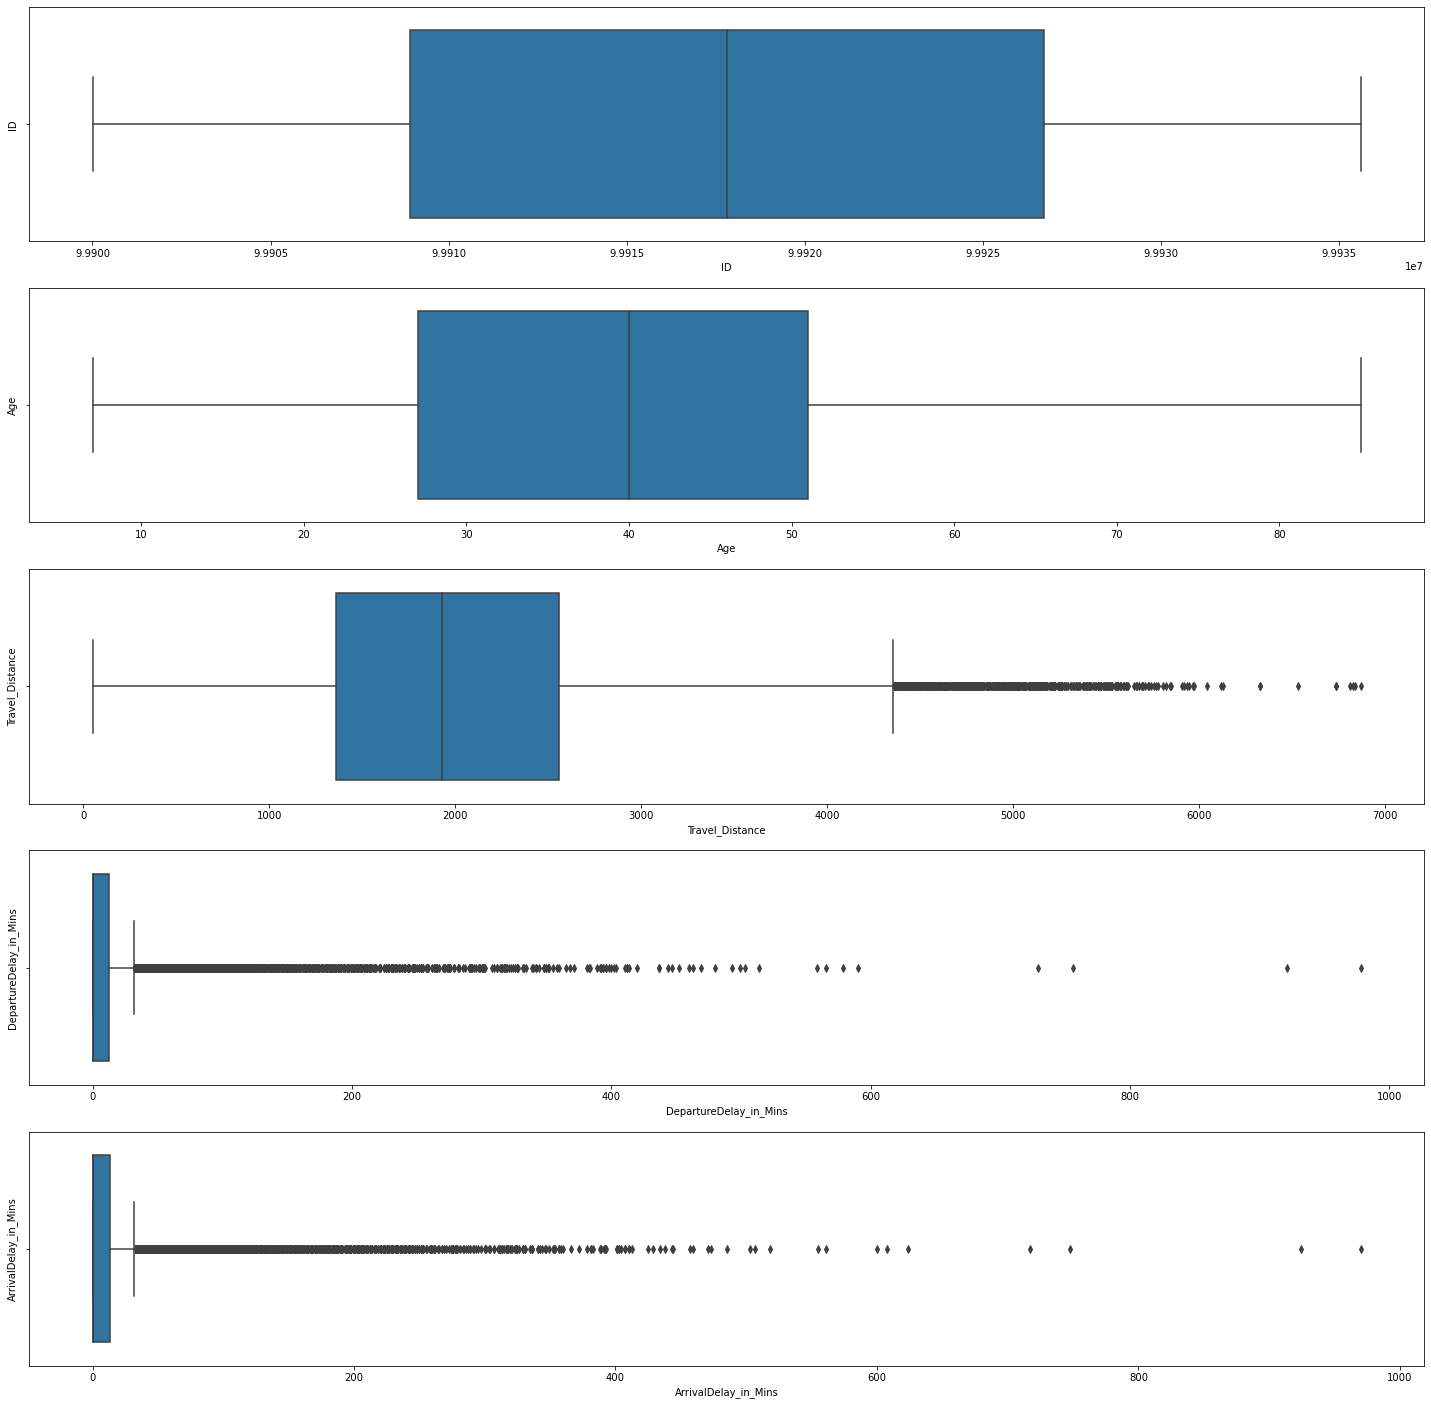

In [649]:
plt.figure(figsize = (25,25))
for i,col in enumerate(df_num1,1):
    plt.subplot(df_num1.shape[1],1,i)
    sns.boxplot(df8[col])
    plt.ylabel(col)
plt.show()

In [650]:
# obtain the first quartile
Q1 = df_num1.drop('ID',axis=1).quantile(0.25)

# obtain the third quartile
Q3 = df_num1.drop('ID',axis=1).quantile(0.75)

# obtain the IQR
IQR = Q3 - Q1

# print the IQR
print(IQR)

Age                        24.000000
Travel_Distance          1199.000000
DepartureDelay_in_Mins     13.000000
ArrivalDelay_in_Mins       13.000000
dtype: float64


In [651]:
#df8 = df8[~((df8 < (Q1 - 1.5 * IQR)) |(df8 > (Q3 + 1.5 * IQR))).any(axis=1)]

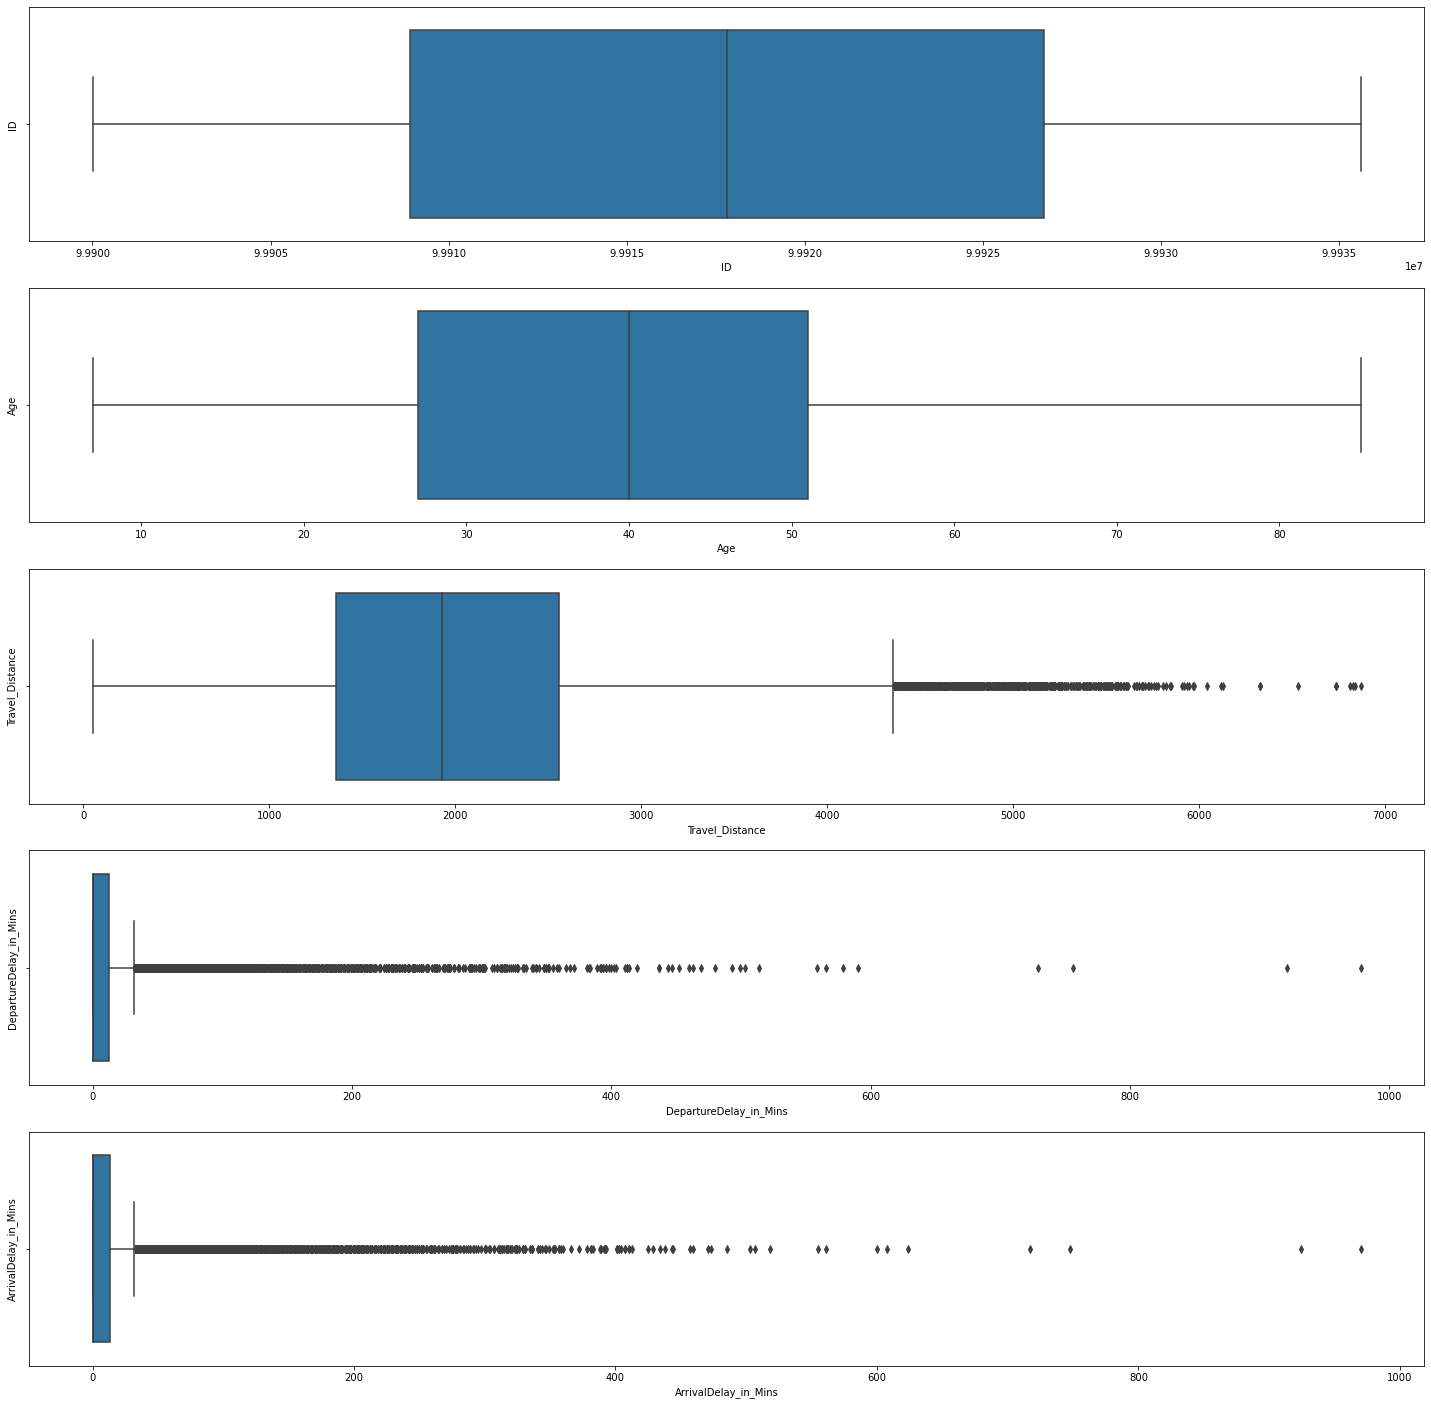

In [652]:
plt.figure(figsize = (25,25))
for i,col in enumerate(df_num1,1):
    plt.subplot(df_num1.shape[1],1,i)
    sns.boxplot(df8[col])
    plt.ylabel(col)
plt.show()

In [653]:
df_num1.head()

,ID,Age,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,99900001,36.000000,532,0.000000,0.000000
1,99900002,21.000000,1425,9.000000,28.000000
2,99900003,60.000000,2832,0.000000,0.000000
3,99900004,29.000000,1352,0.000000,0.000000
4,99900005,18.000000,1610,17.000000,0.000000


In [654]:
df_cat1.head()

,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Gender,CustomerType,TypeTravel,Travel_Class
0,acceptable,Green Car,acceptable,acceptable,manageable,need improvement,excellent,good,excellent,excellent,excellent,excellent,good,excellent,poor,Female,NaN,Business travel,Business
1,extremely poor,Ordinary,good,poor,manageable,acceptable,poor,acceptable,acceptable,excellent,acceptable,good,acceptable,excellent,acceptable,Female,disloyal Customer,Business travel,Business
2,excellent,Ordinary,excellent,excellent,very convinient,excellent,excellent,excellent,need improvement,need improvement,need improvement,need improvement,good,need improvement,excellent,Male,Loyal Customer,Business travel,Business
3,acceptable,Green Car,excellent,acceptable,very convinient,poor,acceptable,excellent,poor,acceptable,need improvement,excellent,excellent,excellent,poor,Female,Loyal Customer,Personal Travel,Eco
4,excellent,Ordinary,extremely poor,excellent,need improvement,excellent,excellent,excellent,excellent,NaN,acceptable,excellent,excellent,excellent,excellent,Male,disloyal Customer,Business travel,Business


In [655]:
df_num1=df8.select_dtypes(include=np.number)
df_cat1 = df8.select_dtypes(include='object')

In [656]:
df_cat1 = pd.get_dummies(df_cat1)

In [657]:
df_cat1.head()

,Seat_comfort_acceptable,Seat_comfort_excellent,Seat_comfort_extremely poor,Seat_comfort_good,Seat_comfort_need improvement,Seat_comfort_poor,Seat_Class_Green Car,Seat_Class_Ordinary,Arrival_time_convenient_acceptable,Arrival_time_convenient_excellent,Arrival_time_convenient_extremely poor,Arrival_time_convenient_good,Arrival_time_convenient_need improvement,Arrival_time_convenient_poor,Catering_acceptable,Catering_excellent,Catering_extremely poor,Catering_good,Catering_need improvement,Catering_poor,Platform_location_Convinient,Platform_location_Inconvinient,Platform_location_manageable,Platform_location_need improvement,Platform_location_very convinient,Onboardwifi_service_acceptable,Onboardwifi_service_excellent,Onboardwifi_service_extremely poor,Onboardwifi_service_good,Onboardwifi_service_need improvement,Onboardwifi_service_poor,Onboard_entertainment_acceptable,Onboard_entertainment_excellent,Onboard_entertainment_extremely poor,Onboard_entertainment_good,Onboard_entertainment_need improvement,Onboard_entertainment_poor,Online_support_acceptable,Online_support_excellent,Online_support_good,Online_support_need improvement,Online_support_poor,Onlinebooking_Ease_acceptable,Onlinebooking_Ease_excellent,Onlinebooking_Ease_extremely poor,Onlinebooking_Ease_good,Onlinebooking_Ease_need improvement,Onlinebooking_Ease_poor,Onboard_service_acceptable,Onboard_service_excellent,Onboard_service_good,Onboard_service_need improvement,Onboard_service_poor,Leg_room_acceptable,Leg_room_excellent,Leg_room_extremely poor,Leg_room_good,Leg_room_need improvement,Leg_room_poor,Baggage_handling_acceptable,Baggage_handling_excellent,Baggage_handling_good,Baggage_handling_need improvement,Baggage_handling_poor,Checkin_service_acceptable,Checkin_service_excellent,Checkin_service_good,Checkin_service_need improvement,Checkin_service_poor,Cleanliness_acceptable,Cleanliness_excellent,Cleanliness_good,Cleanliness_need improvement,Cleanliness_poor,Online_boarding_acceptable,Online_boarding_excellent,Online_boarding_extremely poor,Online_boarding_good,Online_boarding_need improvement,Online_boarding_poor,Gender_Female,Gender_Male,CustomerType_Loyal Customer,CustomerType_disloyal Customer,TypeTravel_Business travel,TypeTravel_Personal Travel,Travel_Class_Business,Travel_Class_Eco
0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0
1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,1,0
2,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,1,0
3,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,1
4,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,1,0


In [658]:
df8 = pd.concat([df_num1,df_cat1],axis=1)
df8.head()

,ID,Age,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Seat_comfort_acceptable,Seat_comfort_excellent,Seat_comfort_extremely poor,Seat_comfort_good,Seat_comfort_need improvement,Seat_comfort_poor,Seat_Class_Green Car,Seat_Class_Ordinary,Arrival_time_convenient_acceptable,Arrival_time_convenient_excellent,Arrival_time_convenient_extremely poor,Arrival_time_convenient_good,Arrival_time_convenient_need improvement,Arrival_time_convenient_poor,Catering_acceptable,Catering_excellent,Catering_extremely poor,Catering_good,Catering_need improvement,Catering_poor,Platform_location_Convinient,Platform_location_Inconvinient,Platform_location_manageable,Platform_location_need improvement,Platform_location_very convinient,Onboardwifi_service_acceptable,Onboardwifi_service_excellent,Onboardwifi_service_extremely poor,Onboardwifi_service_good,Onboardwifi_service_need improvement,Onboardwifi_service_poor,Onboard_entertainment_acceptable,Onboard_entertainment_excellent,Onboard_entertainment_extremely poor,Onboard_entertainment_good,Onboard_entertainment_need improvement,Onboard_entertainment_poor,Online_support_acceptable,Online_support_excellent,Online_support_good,Online_support_need improvement,Online_support_poor,Onlinebooking_Ease_acceptable,Onlinebooking_Ease_excellent,Onlinebooking_Ease_extremely poor,Onlinebooking_Ease_good,Onlinebooking_Ease_need improvement,Onlinebooking_Ease_poor,Onboard_service_acceptable,Onboard_service_excellent,Onboard_service_good,Onboard_service_need improvement,Onboard_service_poor,Leg_room_acceptable,Leg_room_excellent,Leg_room_extremely poor,Leg_room_good,Leg_room_need improvement,Leg_room_poor,Baggage_handling_acceptable,Baggage_handling_excellent,Baggage_handling_good,Baggage_handling_need improvement,Baggage_handling_poor,Checkin_service_acceptable,Checkin_service_excellent,Checkin_service_good,Checkin_service_need improvement,Checkin_service_poor,Cleanliness_acceptable,Cleanliness_excellent,Cleanliness_good,Cleanliness_need improvement,Cleanliness_poor,Online_boarding_acceptable,Online_boarding_excellent,Online_boarding_extremely poor,Online_boarding_good,Online_boarding_need improvement,Online_boarding_poor,Gender_Female,Gender_Male,CustomerType_Loyal Customer,CustomerType_disloyal Customer,TypeTravel_Business travel,TypeTravel_Personal Travel,Travel_Class_Business,Travel_Class_Eco
0,99900001,36.000000,532,0.000000,0.000000,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0
1,99900002,21.000000,1425,9.000000,28.000000,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,1,0
2,99900003,60.000000,2832,0.000000,0.000000,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,1,0
3,99900004,29.000000,1352,0.000000,0.000000,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,1
4,99900005,18.000000,1610,17.000000,0.000000,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,1,0


In [659]:
df8.shape

(35602, 93)

In [660]:
y_pred_rd1 = rd_model.predict(df9)